In [1]:
from pathlib import Path
import os, sys
from geopy.geocoders import GoogleV3, Nominatim
import geopandas as gpd
import pandas as pd

DIR = Path('..')
sys.path.insert(0, str(DIR))
from SCanalyzer import SCanalyzer
from SCanalyzer.busSim import BusSim
from SCanalyzer.busSim.manager import LocalManager
from shapely.geometry import Point
from matplotlib.lines import Line2D

In [2]:
%matplotlib inline

In [11]:
DATA_PATH = "../data/Archive.zip"
OUT_PATH = "/tmp/output"
DAY = "monday"
START_TIME = "09:30:00"
ELAPSE_TIME = "04:00:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 8
geolocator = Nominatim(user_agent="wisc_bazarr_demo")
manager = LocalManager(DATA_PATH, OUT_PATH, None)
busSim = BusSim(manager, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

calendar.txt
routes.txt
shapes.txt
stop_times.txt
__MACOSX/._stop_times.txt
stops.txt
trips.txt
stops.txt
new Stops df    stop_id   stop_name   stop_lat  stop_lon         stop_x        stop_y
0        1  Strawberry  48.850317  2.346295  452043.423262  5.411022e+06
1        2   Tangerine  48.853789  2.349471  452279.698066  5.411406e+06
2        3  Watermelon  48.856077  2.356252  452779.247146  5.411656e+06
calendar.txt
routes.txt
shapes.txt
stop_times.txt
__MACOSX/._stop_times.txt
stops.txt
trips.txt
trips.txt
calendar.txt
routes.txt
shapes.txt
stop_times.txt
__MACOSX/._stop_times.txt
stops.txt
trips.txt
stop_times.txt
calendar.txt
routes.txt
shapes.txt
stop_times.txt
__MACOSX/._stop_times.txt
stops.txt
trips.txt
calendar.txt


In [12]:
def flatten(s):
    return gpd.GeoDataFrame({"geometry": gpd.GeoSeries([s.unary_union])})

In [13]:
def plot(starts=[]):      

    leg_lines = []
    leg_text = []
    
    colors = ["orange", "blue", "green", "yellow"]
    
    zorder = 4
    
    bubbles = []
    
    for i, addr in enumerate(starts):
        zorder += 10
        location = geolocator.geocode(addr)
        lat, lon = (48.850317,2.346295)

        gdf = busSim.get_gdf(start_point=(lat, lon))
        print(gdf.crs)
        gdf = gdf.to_crs(epsg=4326)
        
        color = colors[i % len(colors)]
        bubble = gdf
        bubble["color"] = color
        bubbles.append(bubble)
        ax=bubble.boundary.plot(color=color, linewidth=2, zorder=zorder+2)
        gdf["geometry"].to_crs('+proj=cea').centroid.to_crs(gdf.crs).plot(color="black", ax=ax, markersize=2, zorder=zorder+3)
        #gdf["geometry"].centroid.plot(color="black", ax=ax, markersize=2, zorder=zorder+3)
        start = gpd.GeoSeries([Point(lon, lat)])
        start.plot(ax = ax, marker='o', color="black", markersize=160, zorder=100)
        
        leg_lines.append(Line2D([0], [0], color=color, lw=4))
        leg_text.append(addr)
        
    df = pd.concat(bubbles)
    df.plot(alpha=0.1, ax=ax, color=df["color"], zorder=zorder)

    leg = ax.legend(leg_lines, leg_text, prop={"size": 18}, loc="upper left")
    leg.get_frame().set_facecolor("white")
    leg.get_frame().set_edgecolor("white")

    ax.set_axis_off()
    #print(f'new Stops df {stops_df}')
def demo(addrs_str):
    plot([s.strip() for s in addrs_str.split("\n") if s.strip() != ""])

EPSG:32631


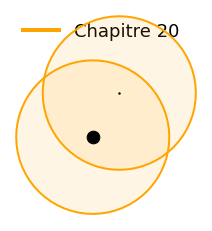

In [14]:
demo("""
Chapitre 20
""")